# training pytorch common

## 事前準備

In [ ]:
!pip list

Package                               Version
------------------------------------- ------------------
absl-py                               1.4.0
accelerate                            1.9.0
aiofiles                              24.1.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.12.15
aiosignal                             1.4.0
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.8
ale-py                                0.11.2
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.10.0
anywidget                             0.9.18
argon2-cffi                           25.1.0
argon2-cffi-bindings                  25.1.0
array_record                          0.7.2
arviz                                 0.22.0
astropy                               7.1.0
astropy

In [ ]:
import torch

torch.__version__

'2.6.0+cu124'

## Tensor

### Tensor生成

In [ ]:
# @title 1次元リストから生成
a = torch.tensor([1, 2, 3])

f"value: {a}, type: {type(a)}"

"value: tensor([1, 2, 3]), type: <class 'torch.Tensor'>"

In [ ]:
# @title 2次元リストから生成
b = torch.tensor([[1, 2], [3, 4]])

f"value: {b}, type: {type(b)}"

"value: tensor([[1, 2],\n        [3, 4]]), type: <class 'torch.Tensor'>"

In [ ]:
# @title dtypeを指定し、倍精度のTensorにする
c = torch.tensor([[1, 2], [3, 4]], dtype=torch.float64)

f"value: {c}, type: {type(c)}"

"value: tensor([[1., 2.],\n        [3., 4.]], dtype=torch.float64), type: <class 'torch.Tensor'>"

In [ ]:
# @title 0~9までの整数で初期化
d = torch.arange(0, 10)

f"value: {d}, type: {type(d)}"

"value: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), type: <class 'torch.Tensor'>"

In [ ]:
# @title 全てがゼロの2x3のTensor
e = torch.zeros(2, 3)

f"value: {e}, type: {type(e)}"

"value: tensor([[0., 0., 0.],\n        [0., 0., 0.]]), type: <class 'torch.Tensor'>"

In [ ]:
# @title 全ての値が乱数の2x3のTensor
f = torch.rand(2, 3)

f"value: {f}, type: {type(f)}"

"value: tensor([[0.5768, 0.3084, 0.9834],\n        [0.4286, 0.6024, 0.3800]]), type: <class 'torch.Tensor'>"

In [ ]:
# @title Tensorの形状(サイズ)を取得
f.size()

torch.Size([2, 3])

In [ ]:
# @title -5 ~ 5 までの連続値を10個生成
g = torch.linspace(-5, 5, 10)
g

tensor([-5.0000, -3.8889, -2.7778, -1.6667, -0.5556,  0.5556,  1.6667,  2.7778,
         3.8889,  5.0000])

In [ ]:
# @title Tensor -> Numpy
a = torch.tensor([[1, 2], [3, 4]])
b = a.numpy()

f"value: {b}, type: {type(b)}"

"value: [[1 2]\n [3 4]], type: <class 'numpy.ndarray'>"

In [ ]:
# @title Numpy -> Tensor
c = torch.from_numpy(b)

f"value: {c}, type: {type(c)}"

"value: tensor([[1, 2],\n        [3, 4]]), type: <class 'torch.Tensor'>"

### Tensorアクセス

In [ ]:
a = torch.tensor([[1, 2, 3], [4, 5, 6]])

In [ ]:
# @title 2つのインデックスを指定
a[0, 1]

tensor(2)

In [ ]:
# @title 範囲を指定
a[1:2, :2]

tensor([[4, 5]])

In [ ]:
# @title リストで複数のインデックスを指定
a[:, [0, 2]]

tensor([[1, 3],
        [4, 6]])

In [ ]:
# @title 3より大きい要素のみ指定
a[a > 3]

tensor([4, 5, 6])

In [ ]:
# @title 要素の変更
a[0, 2] = 11
a

tensor([[ 1,  2, 11],
        [ 4,  5,  6]])

In [ ]:
# @title 要素の一括変更
a[:, 1] = 22
a

tensor([[ 1, 22, 11],
        [ 4, 22,  6]])

In [ ]:
# @title 10より大きい要素のみ変更
a[a > 10] = 33
a

tensor([[ 1, 33, 33],
        [ 4, 33,  6]])

### Tensor演算

In [ ]:
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])

c = torch.tensor([[6, 5, 4], [3, 2, 1]])
a, b, c

(tensor([1, 2, 3]),
 tensor([4, 5, 6]),
 tensor([[6, 5, 4],
         [3, 2, 1]]))

In [ ]:
# @title ベクトルとスカラーの演算
a + 3

tensor([4, 5, 6])

In [ ]:
# @title ベクトル同士の演算
a + b

tensor([5, 7, 9])

In [ ]:
# @title 行列とスカラーの演算
c + 3

tensor([[9, 8, 7],
        [6, 5, 4]])

In [ ]:
# @title 行列とベクトルの演算
# 行列Cの各行に行ベクトルAが加算されている（ブロードキャスト）
c + a

tensor([[7, 7, 7],
        [4, 4, 4]])

In [ ]:
# @title 行列同士の演算
c + c

tensor([[12, 10,  8],
        [ 6,  4,  2]])

### 形状変換

In [ ]:
# @title 2次元変換
a = torch.tensor([0, 1, 2, 3, 4, 5, 6, 7])
b = a.view(2, 4)
b

tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]])

In [ ]:
# 片方は-1にすると自動計算可能
b = a.view(2, -1)
b

tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]])

In [ ]:
# @title 1次元変換
c = torch.tensor([[[0, 1], [2, 3]], [[4, 5], [6, 7]]])

f = c.view(-1)
f

tensor([0, 1, 2, 3, 4, 5, 6, 7])

In [ ]:
# @title 要素数1の次元を削除

# 4次元ベクトル作成
g = torch.arange(0, 8).view(1, 2, 1, 4)
print((g, g.size()))

# 次元削除
h = g.squeeze()
h, h.size()

(tensor([[[[0, 1, 2, 3]],

         [[4, 5, 6, 7]]]]), torch.Size([1, 2, 1, 4]))


(tensor([[0, 1, 2, 3],
         [4, 5, 6, 7]]),
 torch.Size([2, 4]))

In [ ]:
# @title 要素数1の次元を追加
i = torch.arange(0, 8).view(2, -1)
print((i, i.size()))

# 一番内側（2）に追加
j = i.unsqueeze(2)
j, j.size()

(tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]]), torch.Size([2, 4]))


(tensor([[[0],
          [1],
          [2],
          [3]],
 
         [[4],
          [5],
          [6],
          [7]]]),
 torch.Size([2, 4, 1]))

### 統計値の計算

In [ ]:
a = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float32)

m = torch.mean(a)
print(f"m: {m.item()}")

m = a.mean()
print(f"m: {m.item()}")

# 列ごとの平均
print(f"m: {a.mean(0)}")

print(f"sum: {torch.sum(a).item()}")

print(f"max: {torch.max(a).item()}")

print(f"min: {torch.min(a).item()}")

m: 3.5
m: 3.5
m: tensor([2.5000, 3.5000, 4.5000])
sum: 21.0
max: 6.0
min: 1.0


## 活性化関数

In [ ]:
import torch
from torch import nn

import matplotlib.pyplot as plt

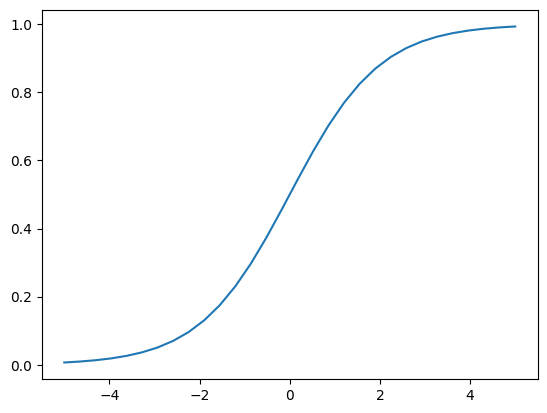

In [ ]:
# @title シグモイド関数
m = nn.Sigmoid()

x = torch.linspace(-5, 5, 30)
y = m(x)
plt.plot(x, y)
plt.show()

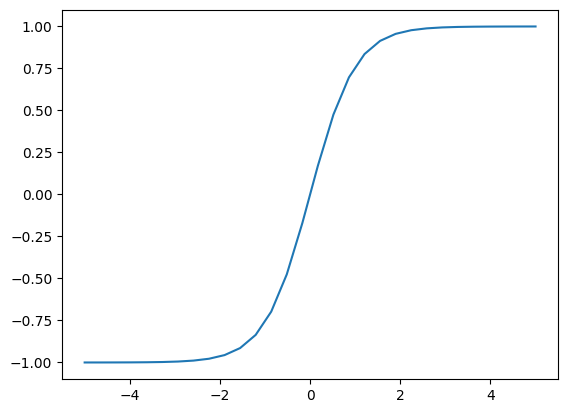

In [ ]:
# @title tanh関数
m = nn.Tanh()

x = torch.linspace(-5, 5, 30)
y = m(x)
plt.plot(x, y)
plt.show()

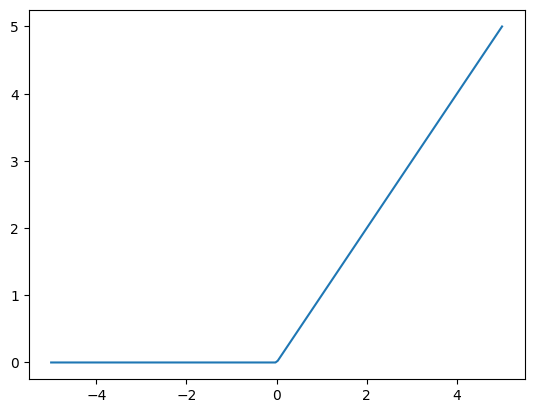

In [ ]:
# @title ReLU関数
m = nn.ReLU()

x = torch.linspace(-5, 5, 200)
y = m(x)
plt.plot(x, y)
plt.show()

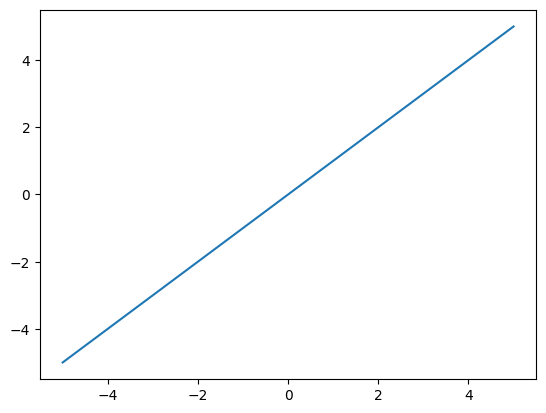

In [ ]:
# @title 恒等関数
# 入力をそのまま出力として返す関数
x = torch.linspace(-5, 5, 50)
y = x
plt.plot(x, y)
plt.show()

In [ ]:
# @title ソフトマックス関数

# 各行でソフトマックスを実施(行の合計値は1になる)
m = nn.Softmax(dim=1)

x = torch.tensor([[1.0, 2.0, 3.0], [3.0, 2.0, 1.0]])
y = m(x)

y, torch.sum(y, dim=1)

(tensor([[0.0900, 0.2447, 0.6652],
         [0.6652, 0.2447, 0.0900]]),
 tensor([1., 1.]))

## 損失関数

In [ ]:
# @title 平均二乗誤差
import torch
from torch import nn

y = torch.tensor([3.0, 3.0, 3.0, 3.0, 3.0]) # 出力
t = torch.tensor([2.0, 2.0, 2.0, 2.0, 2.0]) # 正解

loss_func = nn.MSELoss()
loss = loss_func(y, t)
loss.item()

1.0

In [ ]:
# @title 交差エントロピー誤差
import torch
from torch import nn

x = torch.tensor([[1.0, 2.0, 3.0],      # 入力1
                  [3.0, 1.0, 2.0]])     # 入力2
t = torch.tensor([2,        # 入力1に対する正解
                  0])       # 入力2に対する正解

# ソフトマックス & クロスエントロピー誤差を計算
loss_func = nn.CrossEntropyLoss()
loss = loss_func(x, t)
loss.item()

0.40760600566864014

## シンプルな深層学習の実装

In [ ]:
# @title データ準備
import matplotlib.pyplot as plt
from sklearn import datasets

digits_data = datasets.load_digits()

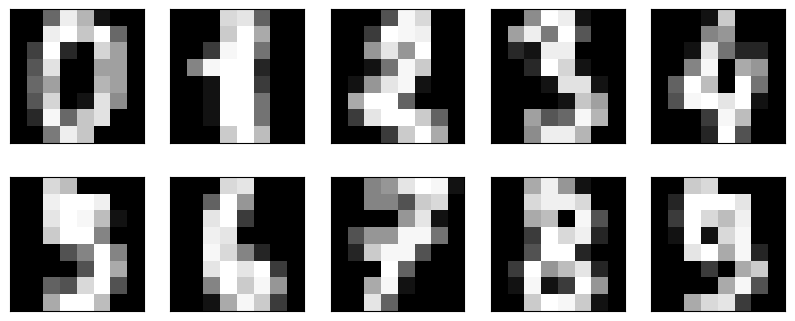

(1797, 64)


In [ ]:
# 画像表示
n_img = 10
plt.figure(figsize=(10, 4))

for i in range(n_img):
    ax = plt.subplot(2, 5, i + 1)
    ax.imshow(digits_data.data[i].reshape(8, 8), cmap="Greys_r")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

print(digits_data.data.shape)

In [ ]:
# @title 訓練用とテスト用に分割
import torch
from sklearn.model_selection import train_test_split

digit_images = digits_data.data
labels = digits_data.target

# 分割
x_train, x_test, t_train, t_test = train_test_split(digit_images, labels, test_size=0.2)

# Tensorに変換
x_train = torch.tensor(x_train, dtype=torch.float32)
t_train = torch.tensor(t_train, dtype=torch.int64)
x_test  = torch.tensor(x_test, dtype=torch.float32)
t_test  = torch.tensor(t_test, dtype=torch.int64)

In [ ]:
# @title モデル構築
from torch import nn

net = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

In [ ]:
net

Sequential(
  (0): Linear(in_features=64, out_features=32, bias=True)
  (1): ReLU()
  (2): Linear(in_features=32, out_features=16, bias=True)
  (3): ReLU()
  (4): Linear(in_features=16, out_features=10, bias=True)
)

In [ ]:
# @title 学習
from torch import optim

loss_func = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)    # lr: 学習率

record_loss_train = []
record_loss_test = []

n_epoch = 1000

for i in range(n_epoch):
    # パラメータの勾配を0に
    optimizer.zero_grad()

    # 順伝搬
    y_train = net(x_train)
    y_test = net(x_test)

    # 誤差算出
    loss_train = loss_func(y_train, t_train)
    loss_test = loss_func(y_test, t_test)
    record_loss_train.append(loss_train.item())
    record_loss_test.append(loss_test.item())

    # 逆伝搬
    loss_train.backward()

    # パラメータ更新
    optimizer.step()

    if i % 100 == 0:
        print(f"Epoch: {i}, loss_train: {loss_train.item():.5f}, loss_test: {loss_test.item():.5f}")

Epoch: 0, loss_train: 2.40135, loss_test: 2.41299
Epoch: 100, loss_train: 0.74819, loss_test: 0.68670
Epoch: 200, loss_train: 0.37759, loss_test: 0.34700
Epoch: 300, loss_train: 0.23975, loss_test: 0.24072
Epoch: 400, loss_train: 0.17398, loss_test: 0.19122
Epoch: 500, loss_train: 0.13685, loss_test: 0.16277
Epoch: 600, loss_train: 0.11352, loss_test: 0.14486
Epoch: 700, loss_train: 0.09737, loss_test: 0.13252
Epoch: 800, loss_train: 0.08536, loss_test: 0.12356
Epoch: 900, loss_train: 0.07598, loss_test: 0.11673


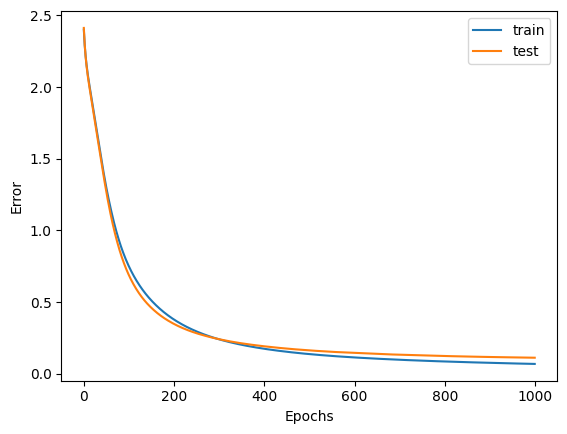

In [ ]:
# @title 誤差の推移
plt.plot(record_loss_train, label="train")
plt.plot(record_loss_test, label="test")
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.legend()
plt.show()

In [ ]:
# @title 正答率
y_test = net(x_test)
count = (y_test.argmax(1) == t_test).sum().item()
print(f"Accuracy: {count / len(t_test)}")

Accuracy: 0.9722222222222222


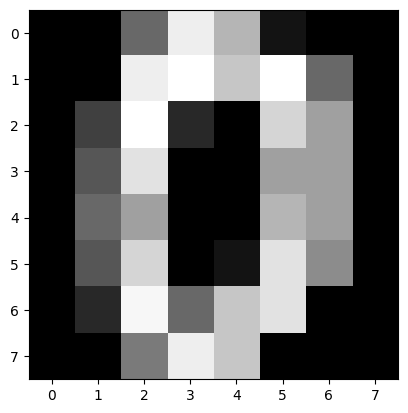

正解: 0, 予測: 0


In [ ]:
# @title 予測
img_id = 0
x_pred = digit_images[img_id]
image = x_pred.reshape(8, 8)
plt.imshow(image, cmap="Greys_r")
plt.show()

x_pred = torch.tensor(x_pred, dtype=torch.float32)
y_pred = net(x_pred)
print(f"正解: {labels[img_id]}, 予測: {y_pred.argmax().item()}")